# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [5]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values 
# Use range for columns to ensure the right shape of the data for the np array --- all rows:one column
#we use the open column to decide the trends of the data

In [29]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [31]:
#feature scaling
#we use normalisation instead of standard scaler with rnn when output has sigmoid activation function
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_sc = sc.fit_transform(training_set)

print(training_set_sc)
print(len(training_set_sc))


[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]
1258


In [8]:
#creating timesteps // important aspect of structuring data for rnn
#here we use 60 timesteps with one output
#this means it looks at every 60 timesteps and outputs one trend
#a month has 20 financial days
#therefore we're looking at a trend of 3 months
#advised to experiment with number of timessteps used

x_train=[]
y_train=[]
for i in range(60, 1258): 
  x_train.append(training_set_sc[i-60:i,0])#should make 1198 records:60 columns
  y_train.append(training_set_sc[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
print(len(x_train))

1198


In [10]:
#Reshaping
#adding more predictors we can use to predict stockprice

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))# shape - batch_size, timestep, number of indicators

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


### Initialising the RNN

In [12]:
RNNregressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [13]:
RNNregressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#return_sequences = true if you are going to stack more LSTM layers beyond this layer
#input_shape = (timestep,number of indicators)
RNNregressor.add(Dropout(0.2))##20% dropout

### Adding a second LSTM layer and some Dropout regularisation

In [14]:
RNNregressor.add(LSTM(units=50, return_sequences=True)) #dont have to specify input shape in additional LSTM layers
RNNregressor.add(Dropout(0.2))##20% dropout

### Adding a third LSTM layer and some Dropout regularisation

In [15]:
RNNregressor.add(LSTM(units=50, return_sequences=True))
RNNregressor.add(Dropout(0.2))##20% dropout

### Adding a fourth LSTM layer and some Dropout regularisation

In [16]:
RNNregressor.add(LSTM(units=50))
RNNregressor.add(Dropout(0.2))##20% dropout

### Adding the output layer

In [17]:
RNNregressor.add(Dense(units=1))

### Compiling the RNN

In [18]:
RNNregressor.compile(optimizer = 'adam', loss = 'mean_squared_error' )#experiment with different optimizeers

### Fitting the RNN to the Training set

In [20]:
RNNregressor.fit(x=x_train, y = y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0062
Epoch 2/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0049
Epoch 3/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [21]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [22]:
dataset_concat=pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
#getting the required values for predicting the 20 fin days  of jan 2017


In [23]:
inputs = dataset_concat[len(dataset_concat)-len(dataset_test)-60 : ].values
#creating new inputs arrays so we don't en up modifying the original data

In [24]:
inputs = inputs.reshape(-1,1)

In [25]:
inputs = sc.transform(inputs)#scaling the inputs

In [26]:
x_test=[]
for i in range(60, 60+20): #create upper bound for 20 financial days of jab 2k17, using timestep = 60
  x_test.append(inputs[i-60:i,0])#should make 1198 records:60 columns
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))# shape - batch_size, timestep, number of indicators

predicted_stock_price = RNNregressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#rescaling predicted values back to original scale

### Visualising the results

AttributeError: ignored

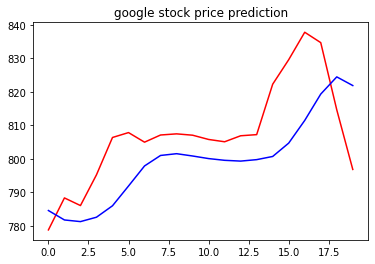

In [27]:
plt.plot(real_stock_price, color ='red', label = "Real google stock price")
plt.plot(predicted_stock_price, color ='blue', label = "Real google stock price")

plt.title('google stock price prediction')
plt.xlablel('Time')
plt.ylablel('Stock Price')
plt.legend()
plt.show()
